## Ejercicios pandas

#### Ejercicio 1

Tenemos las siguientes listas de marcas, modelos y precios en euros de 
arneses de escalada:

In [3]:
marcas  = ['HP', 'HP', 'ASUS', 'Lenovo', 'ASUS', 'ASUS', 'HP',
          'Acer', 'Lenovo', 'HP']
modelos = ['Envy', 'Pavilion', 'Transformer', 'Ideapad', 'Zenbook', 'Vivobook', '255',
           'Aspire', 'Ideapad 530S', 'Stream']
precios = [1099.00, 927.48, 199.00, 365.17, 899.00, 599.00, 260.31, 285.09, 
           699.00, 164.37]

1. Construir un DataFrame con los datos anteriores.
2. Localizar los modelos que tienen un precio menor de 500 euros.
3. Crear una nueva columna que contenga el precio original para todos los productos salvo los de la marca HP, a los que se aplicará un descuento del 10%.
4. Crea una lista de 10 números aleatorios entre 0 y 50 y añádela al DataFrame en la columna 'Ventas'
5. Añade en la columna 'Total' el producto del precio de cada portátil por el número de unidades vendidas ('Ventas')
6. Calcular las ventas y ganancias totales
7. (Avanzado) Calcular las ventas y ganancias totales y número de productos para cada marca

In [4]:
import pandas as pd
df = pd.DataFrame({'marca': marcas, 'modelo': modelos, 'precio': precios})
df

,marca,modelo,precio
0,HP,Envy,1099.00
1,HP,Pavilion,927.48
2,ASUS,Transformer,199.00
3,Lenovo,Ideapad,365.17
4,ASUS,Zenbook,899.00
5,ASUS,Vivobook,599.00
6,HP,255,260.31
7,Acer,Aspire,285.09
8,Lenovo,Ideapad 530S,699.00
9,HP,Stream,164.37


In [16]:
import numpy as np
df['ratio'] = np.where(df['marca'] == 'HP', 0.9, 1)
df

,marca,modelo,precio,ratio
0,HP,Envy,1099.00,0.9
1,HP,Pavilion,927.48,0.9
2,ASUS,Transformer,199.00,1.0
3,Lenovo,Ideapad,365.17,1.0
4,ASUS,Zenbook,899.00,1.0
5,ASUS,Vivobook,599.00,1.0
6,HP,255,260.31,0.9
7,Acer,Aspire,285.09,1.0
8,Lenovo,Ideapad 530S,699.00,1.0
9,HP,Stream,164.37,0.9


In [21]:
np.random.seed(1234)
df['precio_desc'] = df['precio'] * df['ratio']
df['ventas'] = np.random.choice(range(1, 51), size=df['precio'].size)
df['ganancias'] = df['ventas'] * df['precio']
df

,marca,modelo,precio,ratio,precio_desc,ventas,ganancias
0,HP,Envy,1099.00,0.9,989.100,48,52752.00
1,HP,Pavilion,927.48,0.9,834.732,20,18549.60
2,ASUS,Transformer,199.00,1.0,199.000,39,7761.00
3,Lenovo,Ideapad,365.17,1.0,365.170,13,4747.21
4,ASUS,Zenbook,899.00,1.0,899.000,25,22475.00
5,ASUS,Vivobook,599.00,1.0,599.000,16,9584.00
6,HP,255,260.31,0.9,234.279,50,13015.50
7,Acer,Aspire,285.09,1.0,285.090,24,6842.16
8,Lenovo,Ideapad 530S,699.00,1.0,699.000,42,29358.00
9,HP,Stream,164.37,0.9,147.933,27,4437.99


In [22]:
df[ ['ganancias', 'ventas'] ].sum()

ganancias    169522.46
ventas          304.00
dtype: float64

#### Ejercicio 2

1. Carga en un DataFrame este dataset:
https://archive.ics.uci.edu/ml/datasets/Automobile
2. Comprueba si tiene datos que faltan y elimina dichas filas
3. Obtén la longitud (`length`) y anchuras (`width`) medias por cada categoría de `body-style`
4. Analiza el atributo peso (`curb-weight`) y dibuja su histograma
5. Analiza cuál es el número de cilindros (`num-of-cylinders`) más frecuente
6. Obtén una lista ordenada de las diferentes marcas (`make`) de coches
7. Calcula la media del precio (`price`) para los coches agrupados por número de puertas (`num-of-doors`) y tipo de tracción (`engine-location`)
8. Selecciona los coches de la marca Toyota y cuyo precio sea mayor que la media
9. ¿Son más caros los coches de gas o de diesel (`fuel-type`)? Dibuja un boxplot
10. (Avanzado) En lugar de eliminar los datos que faltan complétalos. Si la columna es numérica, complétalos con la media, sino con el valor más frecuente

In [5]:
import pandas as pd

names = ['make', 'fuel-type', 'num-of-doors', 'body-style', 'engine-location', 
         'length', 'width', 'curb-weight', 'price']

col_idx = [2, 3, 5, 6, 8, 10, 11, 13, 25]

autos = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/'
                    'autos/imports-85.data', header=None, na_values=['?'], 
                    usecols=col_idx, names=names)

autos.dtypes

make                object
fuel-type           object
num-of-doors        object
body-style          object
engine-location     object
length             float64
width              float64
curb-weight          int64
price              float64
dtype: object

In [7]:
autos.head()

,make,fuel-type,num-of-doors,body-style,engine-location,length,width,curb-weight,price
0,alfa-romero,gas,two,convertible,front,168.8,64.1,2548,13495.0
1,alfa-romero,gas,two,convertible,front,168.8,64.1,2548,16500.0
2,alfa-romero,gas,two,hatchback,front,171.2,65.5,2823,16500.0
3,audi,gas,four,sedan,front,176.6,66.2,2337,13950.0
4,audi,gas,four,sedan,front,176.6,66.4,2824,17450.0


In [12]:
autos.isnull().mean() * 100

make               0.00000
fuel-type          0.00000
num-of-doors       0.97561
body-style         0.00000
engine-location    0.00000
length             0.00000
width              0.00000
curb-weight        0.00000
price              1.95122
dtype: float64

In [15]:
autos.groupby('body-style')[['length', 'width']].mean()

,length,width
body-style,,
convertible,170.383333,65.583333
hardtop,176.937500,66.612500
hatchback,166.592857,65.247143
sedan,177.585417,66.260417
wagon,181.304000,66.256000


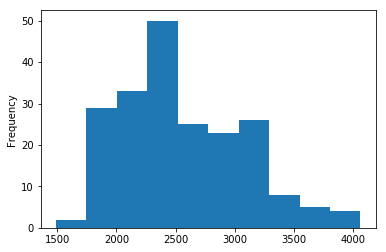

In [20]:
%matplotlib inline
autos['curb-weight'].dropna().plot(kind='hist');

In [26]:
autos['num-of-doors'].value_counts().idxmax()

'four'

In [29]:
np.sort(autos['make'].unique())

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mercury',
       'mitsubishi', 'nissan', 'peugot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [31]:
autos.loc[ (autos['make'] == 'toyota') & (autos['price'] > autos['price'].mean()), :]

,make,fuel-type,num-of-doors,body-style,engine-location,length,width,curb-weight,price
172,toyota,gas,two,convertible,front,176.2,65.6,2975,17669.0
178,toyota,gas,two,hatchback,front,183.5,67.7,2976,16558.0
179,toyota,gas,two,hatchback,front,183.5,67.7,3016,15998.0
180,toyota,gas,four,sedan,front,187.8,66.5,3131,15690.0
181,toyota,gas,four,wagon,front,187.8,66.5,3151,15750.0


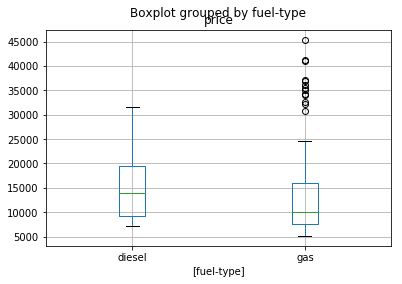

In [32]:
autos[['price', 'fuel-type']].boxplot(by='fuel-type')

In [ ]:
def mean_or_mode(s):
    
    
tofill = autos.agg(mean_or_mode)
fillnae

In [38]:
import numpy as np

def filler(s):
    fillna
    
    fillna
    


autos.apply(filler)

,length,width,curb-weight,price
0,168.8,64.1,2548,13495
1,168.8,64.1,2548,16500
2,171.2,65.5,2823,16500
3,176.6,66.2,2337,13950
4,176.6,66.4,2824,17450
5,177.3,66.3,2507,15250
6,192.7,71.4,2844,17710
7,192.7,71.4,2954,18920
8,192.7,71.4,3086,23875
9,178.2,67.9,3053,<function mean at 0x7f7ea6613400>


In [53]:
tofill = pd.concat((autos.mean(), autos.select_dtypes(exclude='number').mode().loc[0]))

In [56]:
tofill

length             174.049
width              65.9078
curb-weight        2555.57
price              13207.1
make                toyota
fuel-type              gas
num-of-doors          four
body-style           sedan
engine-location      front
dtype: object

In [55]:
autos.fillna(tofill)

,make,fuel-type,num-of-doors,body-style,engine-location,length,width,curb-weight,price
0,alfa-romero,gas,two,convertible,front,168.8,64.1,2548,13495.000000
1,alfa-romero,gas,two,convertible,front,168.8,64.1,2548,16500.000000
2,alfa-romero,gas,two,hatchback,front,171.2,65.5,2823,16500.000000
3,audi,gas,four,sedan,front,176.6,66.2,2337,13950.000000
4,audi,gas,four,sedan,front,176.6,66.4,2824,17450.000000
5,audi,gas,two,sedan,front,177.3,66.3,2507,15250.000000
6,audi,gas,four,sedan,front,192.7,71.4,2844,17710.000000
7,audi,gas,four,wagon,front,192.7,71.4,2954,18920.000000
8,audi,gas,four,sedan,front,192.7,71.4,3086,23875.000000
9,audi,gas,two,hatchback,front,178.2,67.9,3053,13207.129353


#### Ejercicio 3

1. Carga en un DataFrame este dataset:
https://archive.ics.uci.edu/ml/datasets/Census+Income
2. Estudia si hay variables como el nivel educativo o el país que influyen en
que se tuviese un salario mayor o menor de 50K. Puedes simplemente
obtener la cuenta de las veces que sucede una u otra cosa de los
diferentes grupos para comenzar, y después utilizar técnicas gráficas, e
incluso un contraste de hipótesis.

#### Ejercicio 4

Con el conjunto de datos `weather`:
  * Crear una variable 'Month' con el mes de cada observación
  * Calcular el número de días que nieva cada mes en porcentaje
  * Hacer un gráfico de barras de la variable anterior

Con el conjunto de datos `nycity`:
  * Seleccionar las columnas 'Complaint Type' y 'Location Type'
  * Seleccionar las filas con quejas de ruido ("Noise")
  * Ver que localización ('Location Type') tiene más quejas de ruido
  * Ordenaro de menor a mayor
  * Hacer un gráfico de barras del número de quejas

In [12]:
import pandas as pd

weather = pd.read_csv('../data/weather_2012.csv', parse_dates=['Date/Time'])
weather.head()

,Date/Time,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
0,2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [21]:
weather['Month'] = weather['Date/Time'].dt.month
weather['Day']   = weather['Date/Time'].dt.day
weather['Snow']  = weather['Weather'].str.contains('Snow')
weather.head()

,Date/Time,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather,Month,Day,Snow
0,2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog,1,1,False
1,2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog,1,1,False
2,2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog",1,1,False
3,2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog",1,1,False
4,2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog,1,1,False


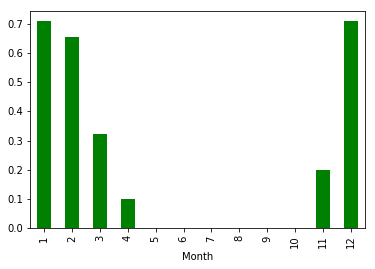

In [22]:
%matplotlib inline
(weather.groupby(['Month', 'Day'])['Snow']
        .any()
        .groupby('Month')
        .mean()
        .plot(kind='bar', color='green'));

In [13]:
data = pd.read_csv('https://data.cityofnewyork.us/api/views/qaum-u4fw/'
                   'rows.csv?accessType=DOWNLOAD',
                   low_memory=False)

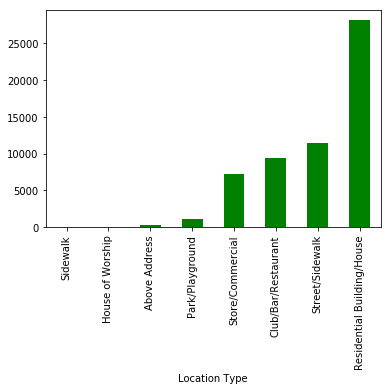

In [19]:
is_noise = data['Complaint Type'].str.contains('Noise')

(data.loc[is_noise, ['Complaint Type', 'Location Type']]
     .groupby('Location Type')
     .size()
     .sort_values()
     .plot(kind='bar', color='green'));

#### Ejercicio 5

Con el conjunto de datos de las `bikes2016.csv`:
  * Repetir el análisis del notebook principal para los dias de la semana

Con el fichero `AccidentesBicicletas_2017.csv` (http://datos.madrid.es/portal/site/egob), que contiene información sobre los accidentes de tráfico con implicación de bicicletas en Madrid:
  * Leer el fichero en un `DataFrame` de Pandas
  * Ver cuántas variables hay y contar los valores que faltan en cada una de ellas
  * Ver cual es el distrito con más accidentes
  * Hacer un gráfico con el número de accidentes que hay de cada tipo
  * Hacer un gráfico de barras con el número de accidentes por mes

#### Ejercicio 6

Con el conjunto de datos `titanic.csv` (https://www.kaggle.com/c/titanic):
 * Leer los datos en un DataFrame de Pandas
 * Calcular el porcentaje de pasajeros que sobrevivió
 * Ver cuantos valores faltan en cada una de las variables (pista .isnull())
 * Eliminar la variable `cabin`
 * Completar los valores que faltan en `age` con la mediana del resto
 * Crear una nueva variable que contenga el número total de parientes incluyendo al pasajero
 * Crear una nueva variable booleana que sea `True` si el pasajero viajaba solo y `Falso` en caso contrario
 * Calcular la probabilidad de supervivencia en base al sexo
 * Extraer de la varible nombre una nueva que sea el título ('Mr', 'Ms', etc)

In [ ]:
import pandas as pd
df = pd.read_csv('../data/titanic.csv', sep=';', decimal=',')
df.head()
df.dtypes
df['survived'].mean() * 100
# df.shape[0] - df.count()
df.isnull().mean() * 100
df.drop('cabin', axis=1)                 # version 0.20
df.drop(columns=['cabin'], inplace=True) # version 0.21
df['age'].fillna(value=df['age'].median(), inplace=True)
df['total'] = df['sibsp'] + df['parch'] + 1
df['alone'] = df['total'] == 1
df.loc[df['sex'] == 'male', 'survived'].mean()
df.loc[df['sex'] == 'female', 'survived'].mean()
df['title'] = df['name'].str.extract(".*\ (.*)\..*", expand=False)
df1 = df.dropna(how='any')
print(df1.count())

df.groupby(["sex", "pclass"])['survived'].mean()